<a href="https://colab.research.google.com/github/aiaaee/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [3]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder , RobustScaler , TargetEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

## Extraction

In [4]:
with ZipFile("/content/archive (3).zip", 'r') as Unzip:
    Unzip.extractall(path="./")

In [5]:
data = pd.read_csv('/content/FINAL_USO.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [8]:
data.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
...,...
USO_High,float64
USO_Low,float64
USO_Close,float64
USO_Adj Close,float64


## Explority Data Analysis

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [ ]:
for i in data.columns :
  if 'Price' in i :
    print(i)

EU_Price
OF_Price
OS_Price
SF_Price
USB_Price
PLT_Price
PLD_Price
USDI_Price


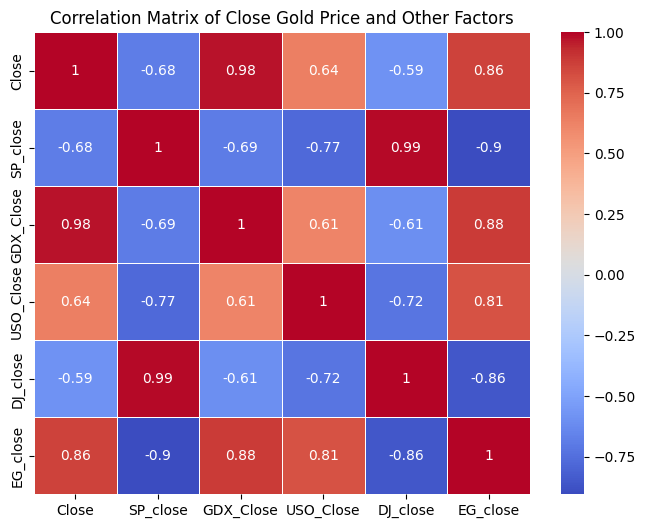

In [ ]:
data_corr =  data.drop('Date' , axis=1)
close_correlation = data[['Close', 'SP_close' , 'GDX_Close' , 'USO_Close', 'DJ_close' , 'EG_close']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(close_correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix of Close Gold Price and Other Factors")
plt.show()

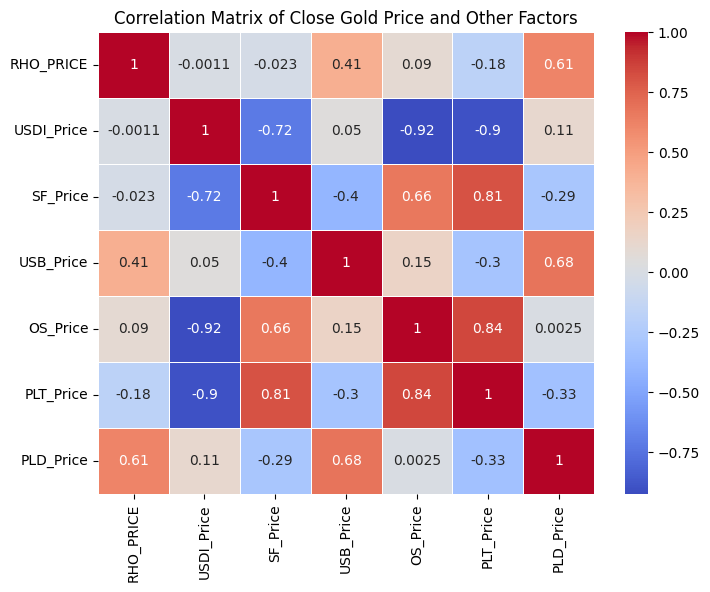

In [ ]:
price_correlation = data[['RHO_PRICE', 'USDI_Price' , 'SF_Price' , 'USB_Price' , 'OS_Price' , 'PLT_Price' , 'PLD_Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix of Close Gold Price and Other Factors")
plt.show()

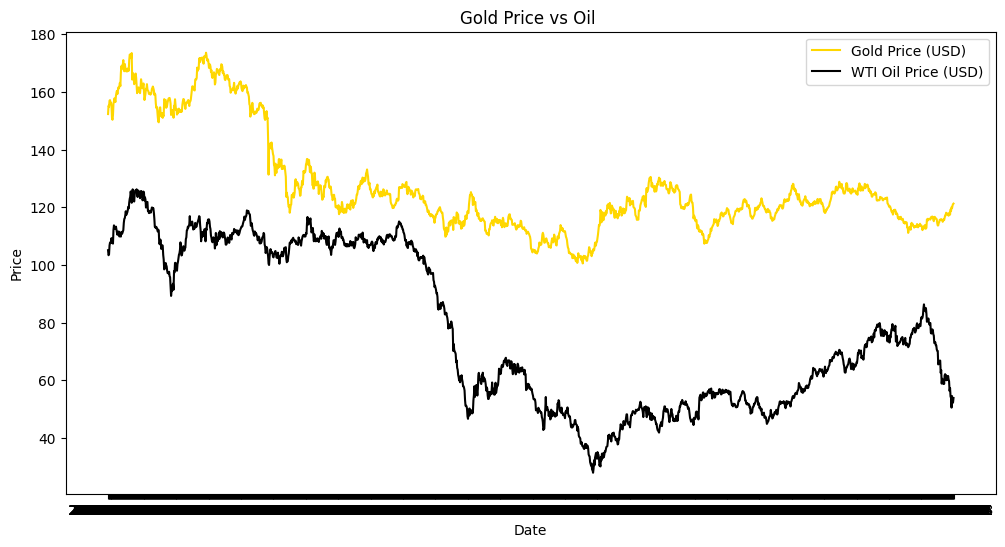

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Gold Price (USD)', color='gold')
plt.plot(data['Date'], data['OF_Price'], label='WTI Oil Price (USD)', color='black')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Gold Price vs Oil ")
plt.show()

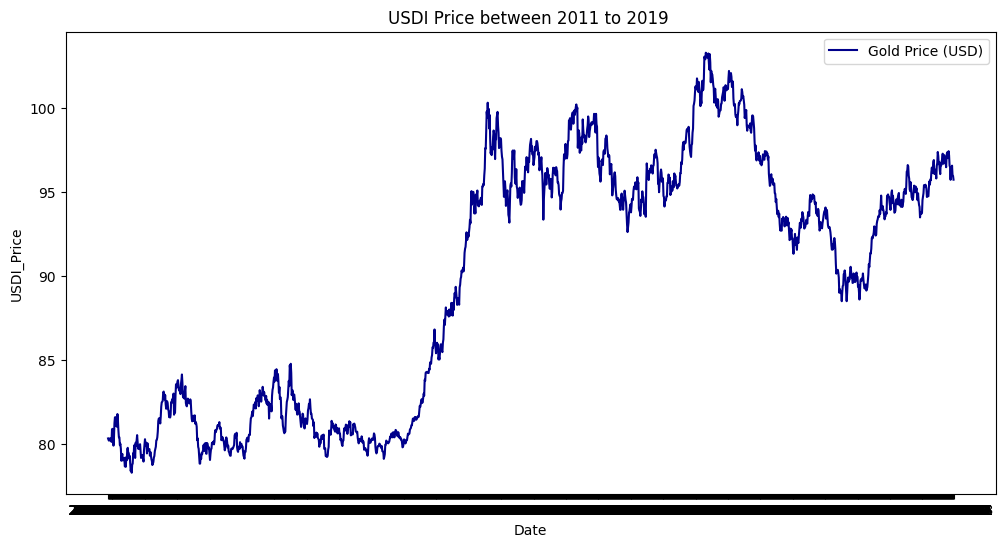

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['USDI_Price'], label='Gold Price (USD)', color='darkblue')

plt.legend()
plt.xlabel("Date")
plt.ylabel("USDI_Price")
plt.title("USDI Price between 2011 to 2019 ")
plt.show()

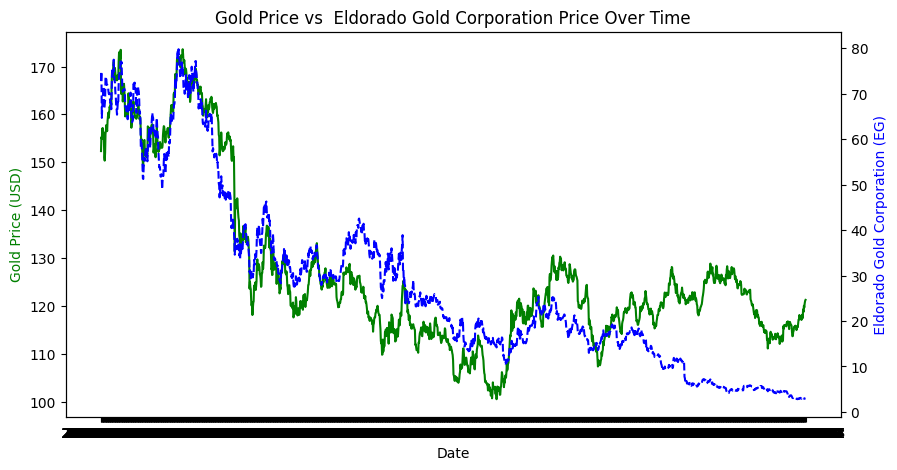

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(data['Date'], data['Close'], 'g-', label="Gold Price")
ax2.plot(data['Date'], data['EG_close'], 'b--', label=" Eldorado Gold Corporation")

ax1.set_xlabel("Date")
ax1.set_ylabel("Gold Price (USD)", color='g')
ax2.set_ylabel(" Eldorado Gold Corporation (EG) ", color='b')

plt.title("Gold Price vs  Eldorado Gold Corporation Price Over Time")
plt.show()

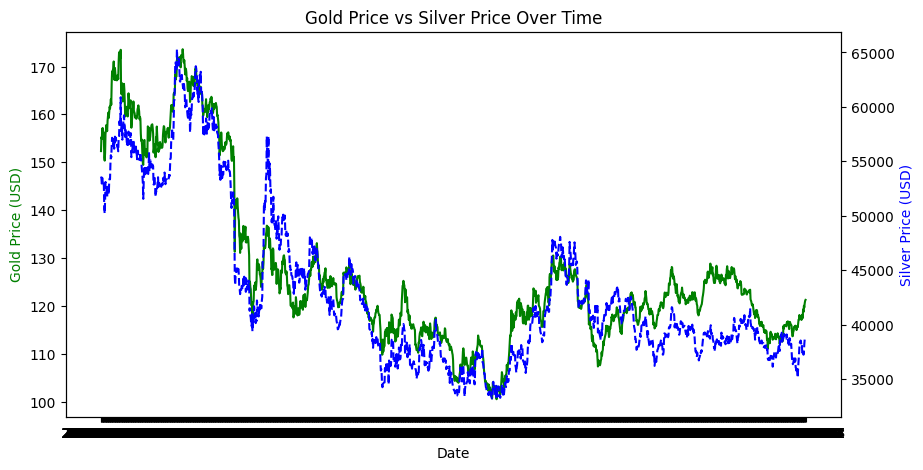

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(data['Date'], data['Close'], 'g-', label="Gold Price")
ax2.plot(data['Date'], data['SF_Price'], 'b--', label="Silver Price")

ax1.set_xlabel("Date")
ax1.set_ylabel("Gold Price (USD)", color='g')
ax2.set_ylabel("Silver Price (USD)", color='b')

plt.title("Gold Price vs Silver Price Over Time")
plt.show()

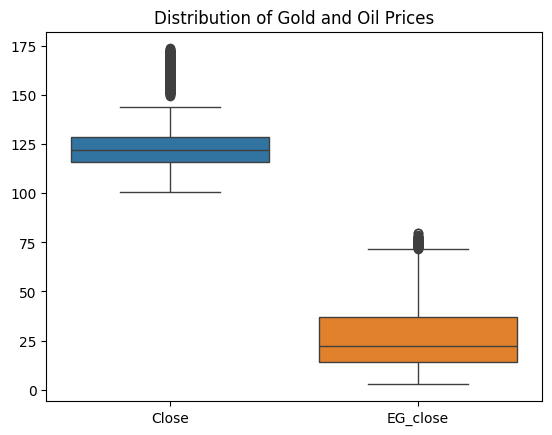

In [ ]:
sns.boxplot(data=data[['Close', 'EG_close']])
plt.title("Distribution of Gold and Oil Prices")
plt.show()

## Data Preprocessing


In [9]:
data = data.drop("Date" , axis=1)

In [10]:
data.isnull().sum().head(15)

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,0
SP_high,0
SP_low,0
SP_close,0


In [11]:
# Adj Close

X = data.loc[: , data.columns != 'Adj Close']
y = data['Adj Close']

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , shuffle=True)

In [13]:
X_train.shape , X_test.shape

((1374, 79), (344, 79))

In [14]:
attributes = []
for i in data.columns :
  if (data[i].dtypes == 'int') or (data[i].dtypes == 'float'):
    attributes.append(i)


In [15]:
attributes.remove('Adj Close')

In [28]:
attr_tr = make_pipeline(
    SimpleImputer(strategy='median') ,
    StandardScaler() ,
    MinMaxScaler(feature_range=(y_test.min(),y_test.max())),
)


preprocessing = ColumnTransformer([
    ('attribute preprocessing' , attr_tr , attributes)
])


## Model Evaluation

In [34]:
rf = RandomForestRegressor(
  n_estimators=100,
  max_depth=20,
  min_samples_leaf=150,
  max_features="sqrt",
  random_state=42
)
model = make_pipeline(preprocessing , rf)

In [35]:
model.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('attribute preprocessing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler(feature_range=(101.459999,
                                                                                               173.610001)))]),
                                                  ['Open', 'High', 'Low',
                                                   'Close', 'Volume', 'SP_open',
                                                   'SP_high', 'SP_low',
                                                   'SP_close', 'SP_Ajclose',
                                                   'SP_volume', 'DJ_open',
                                                   'DJ_high', 'DJ_low',
                                                   'DJ_close', 'DJ_Ajclose',
                                                   'DJ_volume', 'EG_open',
                                                   'EG_high', 'EG_low',
                                                   'EG_close', 'EG_Ajclose',
                                                   'EG_volume', 'EU_Price',
                                                   'EU_open', 'EU_high',
                                                   'EU_low', 'EU_Trend',
                                                   'OF_Price', 'OF_Open', ...])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=150,
                                       random_state=42))])

In [36]:
y_pred = model.predict(X_test)

In [37]:
Mean_squared_error = mean_squared_error(y_test , y_pred)
R2_score = r2_score(y_test , y_pred)

In [38]:
print("The mean squared error is " , Mean_squared_error)
print("The R2 Score is " , R2_score)

The mean squared error is  14.120358546227333
The R2 Score is  0.9546957506996748
